In [3]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np  
import pandas as pd 
import os
import squarify
import matplotlib.font_manager as fm

In [4]:
# Load Datasets

products = pd.read_csv('products.csv')
sells = pd.read_csv('transactions.csv')
customers = pd.read_csv('customers.csv')
employees = pd.read_csv('employees.csv')
stores = pd.read_csv('stores.csv')

In [5]:

# Data Preprocessing

sells['Date'] = pd.to_datetime(sells['Date'])
sells['Month'] = sells['Date'].dt.to_period('M').astype(str)

sells_stores = sells.merge(stores[['Store ID', 'Country', 'Store Name', 'City']], on='Store ID', how='left')
sales_full = sells_stores.merge(products[['Product ID', 'Description EN']], on='Product ID', how='left')
returns_full = sales_full[(sales_full['Transaction Type'] == "Return")]
sales_full = sales_full[(sales_full['Transaction Type'] == "Sale")]
sales_full.rename(columns={'Description EN': 'Product Name'}, inplace=True)

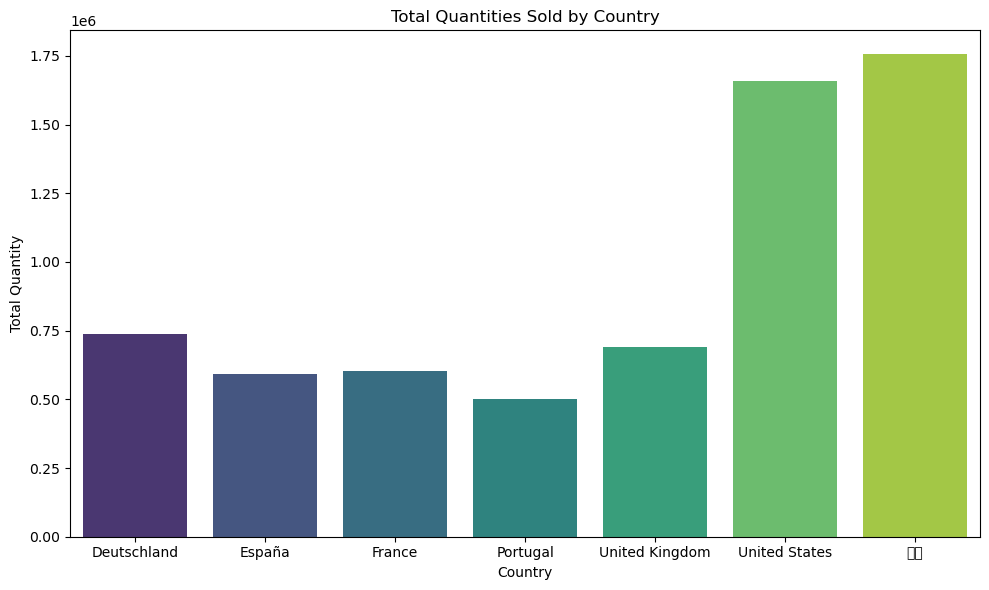

In [6]:
qty_by_country = sales_full.groupby('Country')['Quantity'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=qty_by_country, x='Country', y='Quantity', palette="viridis")
plt.title("Total Quantities Sold by Country")
plt.xlabel("Country")
plt.ylabel("Total Quantity")
plt.tight_layout()
plt.show()

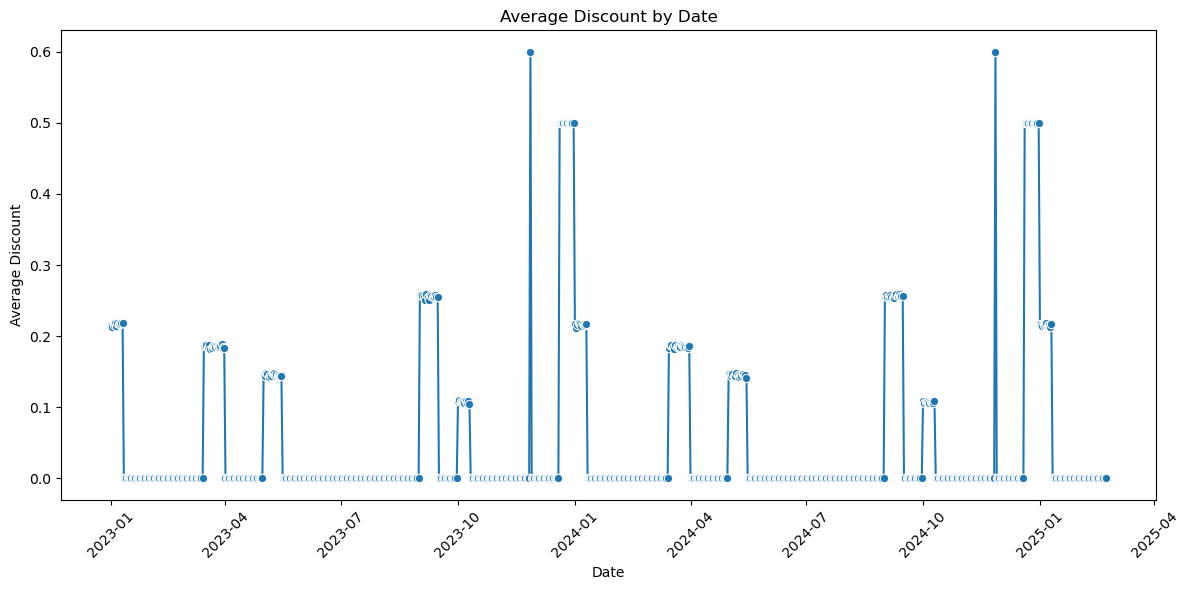

In [7]:
discounts_by_date = sales_full.groupby(sales_full['Date'].dt.date)['Discount'].mean().reset_index()
discounts_by_date['Date'] = pd.to_datetime(discounts_by_date['Date'])

plt.figure(figsize=(12,6))
sns.lineplot(data=discounts_by_date, x='Date', y='Discount', marker="o")
plt.title("Average Discount by Date")
plt.xlabel("Date")
plt.ylabel("Average Discount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

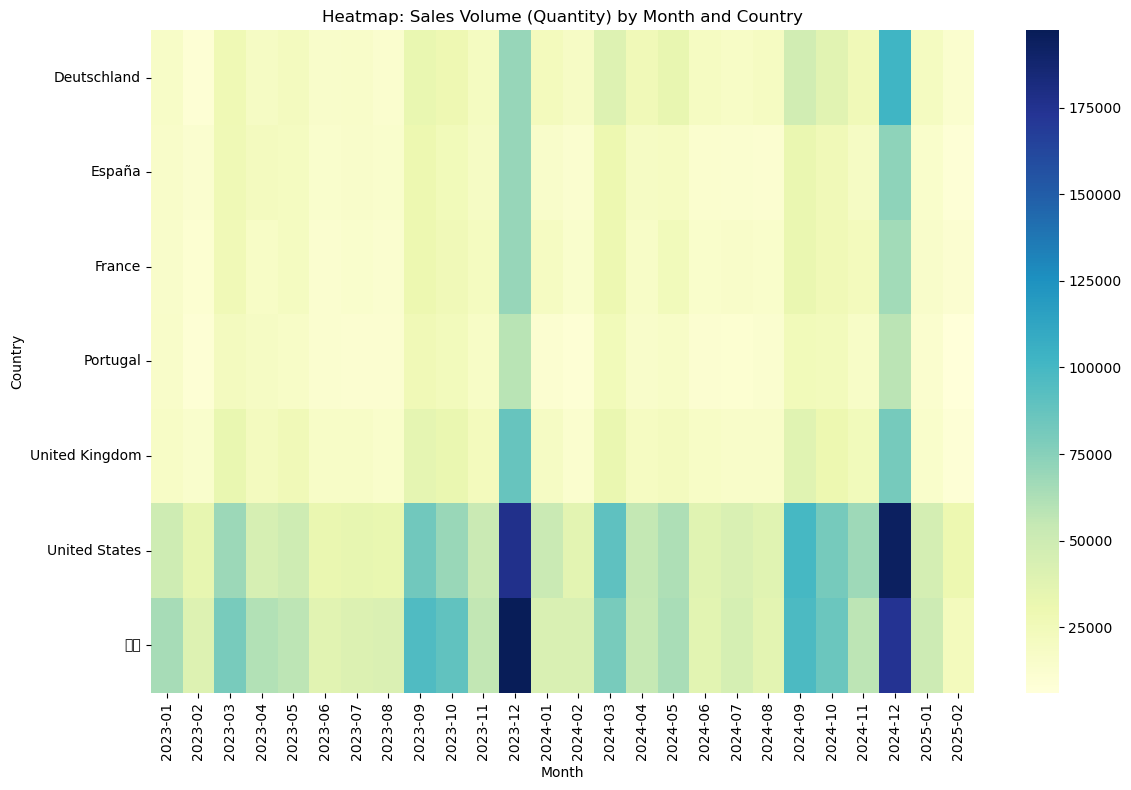

In [8]:
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  

sales_month_country = sales_full.groupby(['Month', 'Country'])['Quantity'].sum().reset_index()
pivot_month_country = sales_month_country.pivot(index='Country', columns='Month', values='Quantity')

plt.figure(figsize=(12,8))
sns.heatmap(pivot_month_country, annot=False, cmap="YlGnBu")

plt.title("Heatmap: Sales Volume (Quantity) by Month and Country")
plt.xlabel("Month")
plt.ylabel("Country")

plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

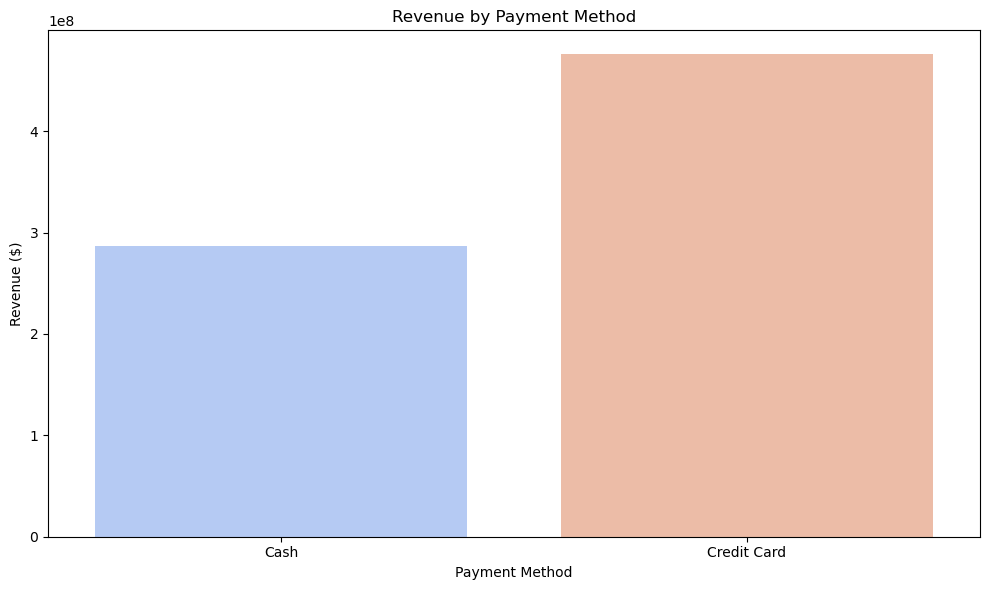

In [9]:
revenue_by_payment = sells.groupby('Payment Method')['Line Total'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=revenue_by_payment, x='Payment Method', y='Line Total', palette="coolwarm")
plt.title("Revenue by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

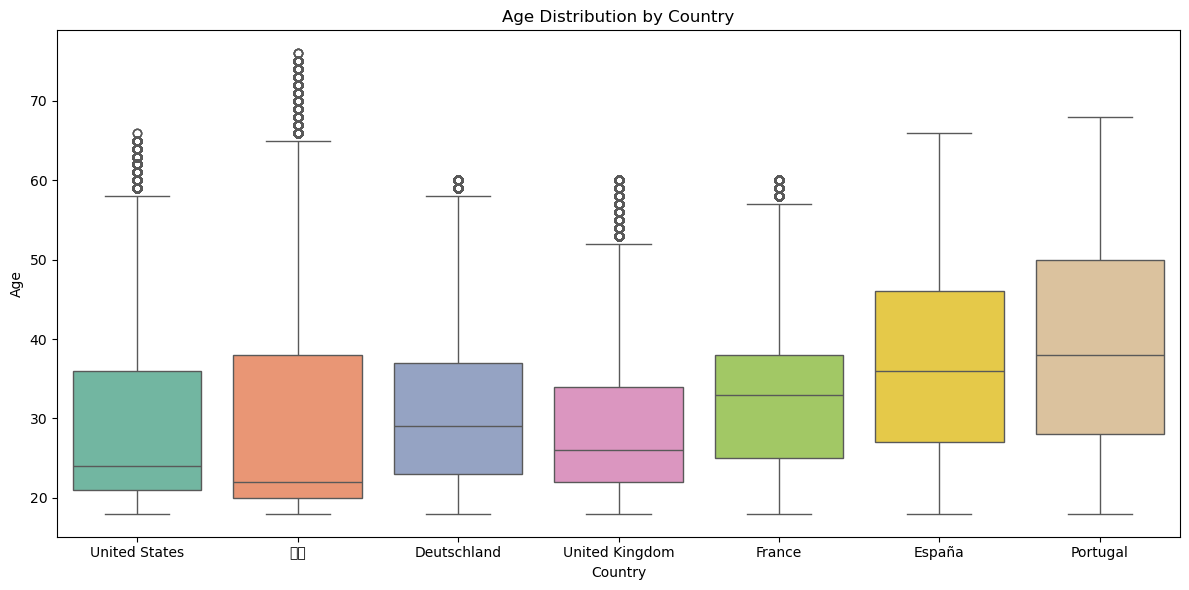

In [10]:
customers['Date Of Birth'] = pd.to_datetime(customers['Date Of Birth'])
today = pd.to_datetime('today')
customers['Age'] = (today - customers['Date Of Birth']).dt.days / 365.25
customers['Age'] = customers['Age'].astype(int)

plt.figure(figsize=(12,6))
sns.boxplot(data=customers, x='Country', y='Age', palette="Set2")
plt.title("Age Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

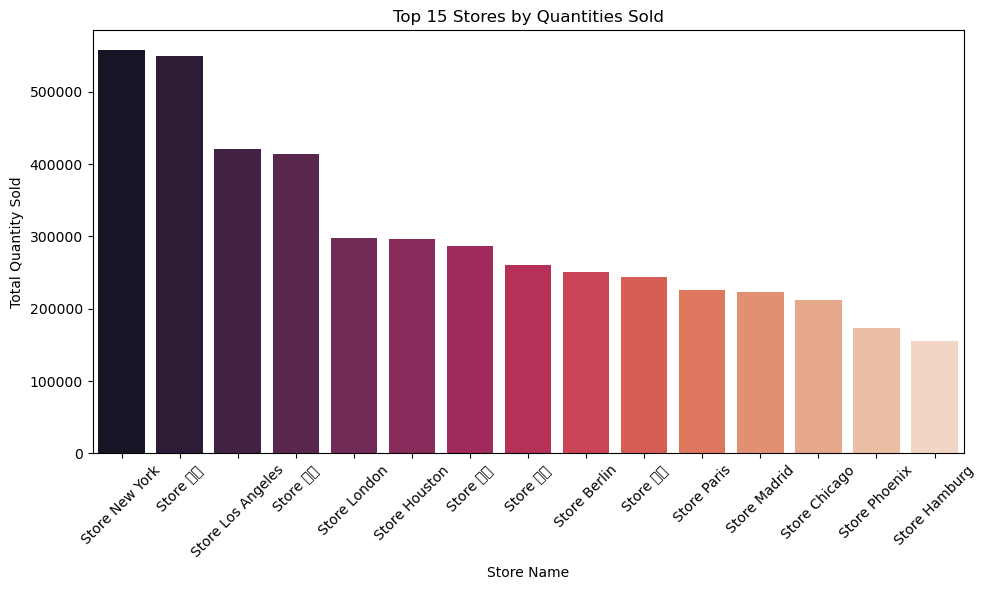

In [11]:
top5_stores = sales_full.groupby('Store Name')['Quantity'].sum().reset_index()
top5_stores = top5_stores.sort_values(by='Quantity', ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(data=top5_stores, x='Store Name', y='Quantity', palette="rocket")
plt.title("Top 15 Stores by Quantities Sold")
plt.xlabel("Store Name")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

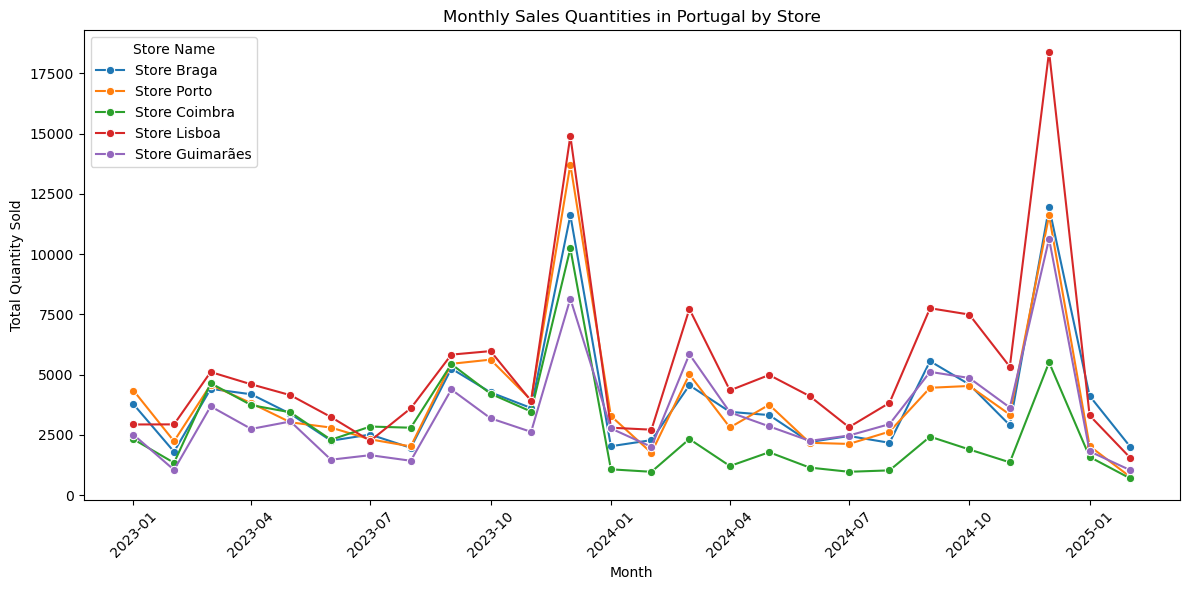

In [12]:
portugal_sales = sales_full[sales_full['Country'].str.lower() == 'portugal']

sales_portugal = portugal_sales.groupby(['Store Name', 'Month'])['Quantity'].sum().reset_index()

sales_portugal['Month_dt'] = pd.to_datetime(sales_portugal['Month'], format='%Y-%m')

sales_portugal = sales_portugal.sort_values(by='Month_dt')

plt.figure(figsize=(12,6))
sns.lineplot(data=sales_portugal, x='Month_dt', y='Quantity', hue='Store Name', marker='o')
plt.title("Monthly Sales Quantities in Portugal by Store")
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

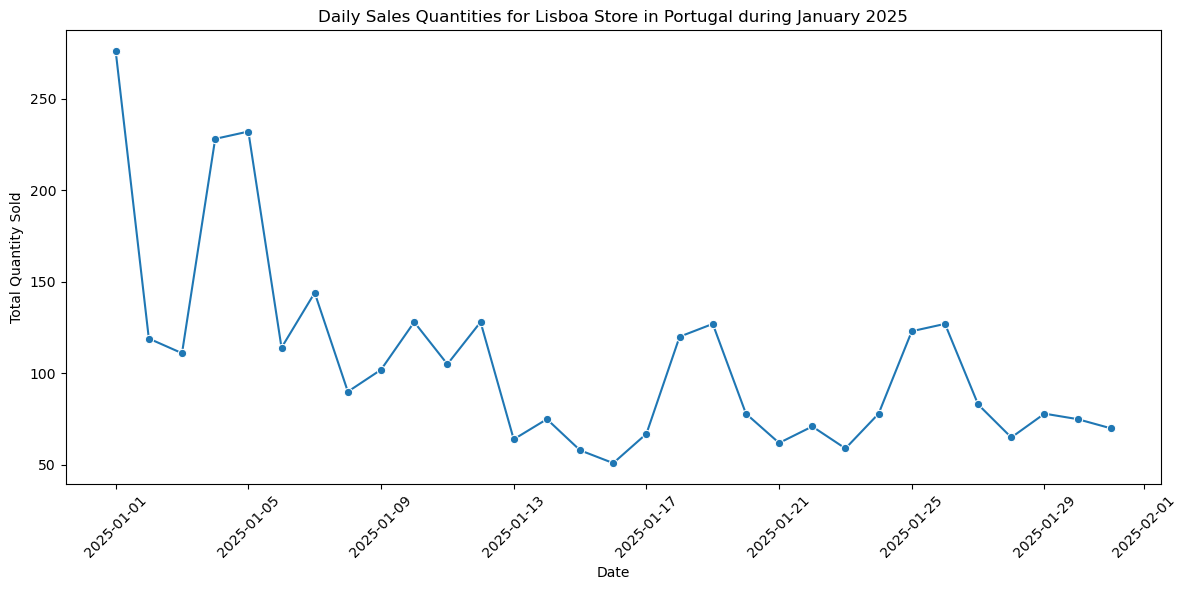

In [13]:
braga_sales = sales_full[
    (sales_full['Country'].str.lower() == 'portugal') &
    (sales_full['Store Name'].str.contains('Lisboa', case=False)) &
    (sales_full['Date'].dt.year == 2025)
]

braga_january_2025 = braga_sales[braga_sales['Date'].dt.month == 1]

daily_braga_2025 = braga_january_2025.groupby(braga_january_2025['Date'].dt.date)['Quantity'].sum().reset_index()
daily_braga_2025.columns = ['Date', 'Total Quantity']

plt.figure(figsize=(12,6))
sns.lineplot(data=daily_braga_2025, x='Date', y='Total Quantity', marker='o')
plt.title("Daily Sales Quantities for Lisboa Store in Portugal during January 2025")
plt.xlabel("Date")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

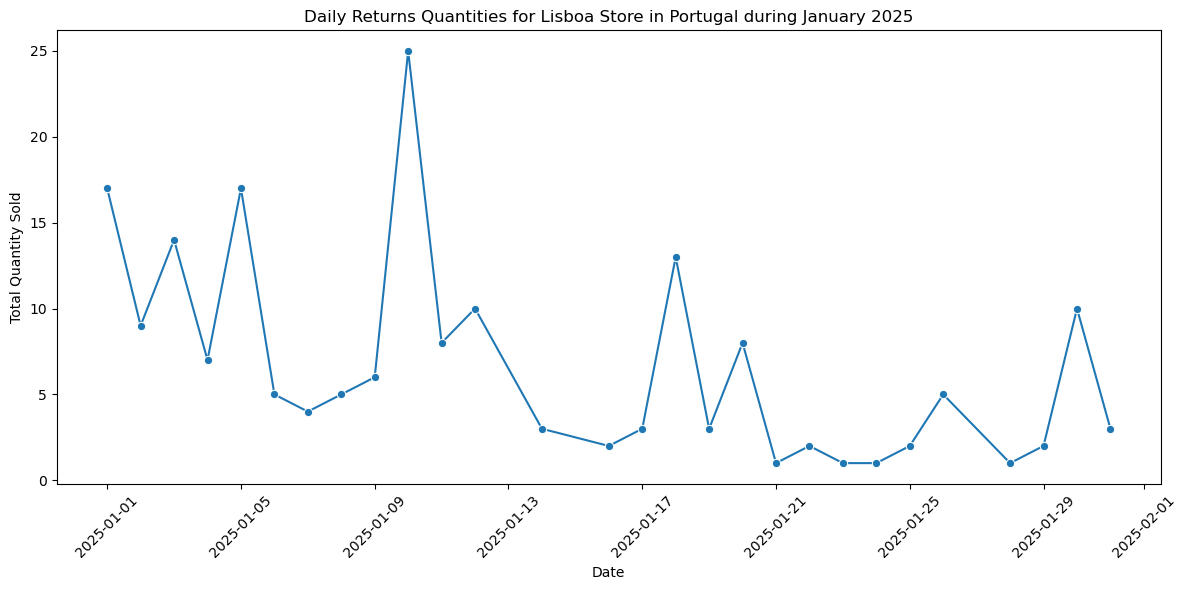

In [14]:
braga_sales = returns_full[
    (returns_full['Country'].str.lower() == 'portugal') &
    (returns_full['Store Name'].str.contains('Lisboa', case=False)) &
    (returns_full['Date'].dt.year == 2025)
]

braga_january_2025 = braga_sales[braga_sales['Date'].dt.month == 1]

daily_braga_2025 = braga_january_2025.groupby(braga_january_2025['Date'].dt.date)['Quantity'].sum().reset_index()
daily_braga_2025.columns = ['Date', 'Total Quantity']

plt.figure(figsize=(12,6))
sns.lineplot(data=daily_braga_2025, x='Date', y='Total Quantity', marker='o')
plt.title("Daily Returns Quantities for Lisboa Store in Portugal during January 2025")
plt.xlabel("Date")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

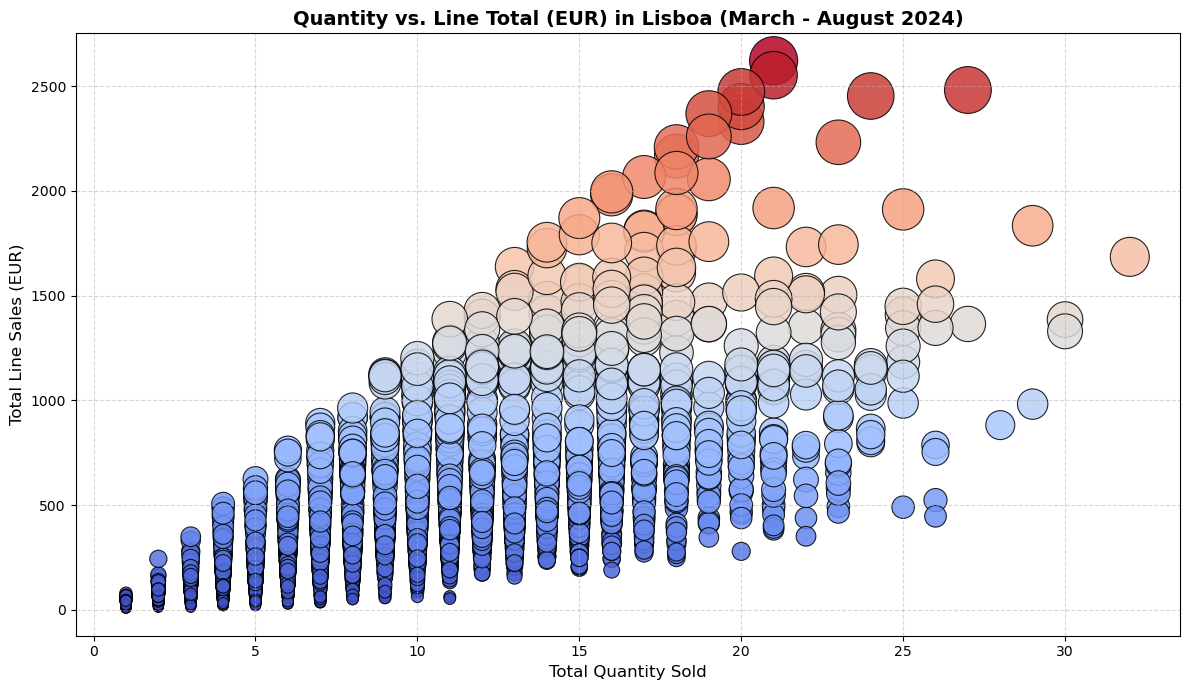

In [15]:
braga_sales_season = sales_full[
    (sales_full['Country'].str.lower() == 'portugal') &
    (sales_full['Store Name'].str.contains('Lisboa', case=False, na=False)) &  
    (sales_full['Date'].dt.year == 2024) &  
    (sales_full['Date'].dt.month >= 3) &  
    (sales_full['Date'].dt.month <= 8)    
    & (sales_full['Currency'] == 'EUR')  
]

braga_sales_summary = braga_sales_season.groupby(['Product ID', 'Product Name'], as_index=False).agg({
    'Quantity': 'sum',
    'Line Total': 'sum'
})

plt.figure(figsize=(12,7))

sns.scatterplot(
    data=braga_sales_summary, 
    x='Quantity', 
    y='Line Total', 
    size='Line Total',  
    sizes=(50, 1200), 
    hue='Line Total',  
    palette="coolwarm",  
    alpha=0.85,  
    edgecolor="black",  
    linewidth=0.8
)

plt.title("Quantity vs. Line Total (EUR) in Lisboa (March - August 2024)", fontsize=14, fontweight='bold')
plt.xlabel("Total Quantity Sold", fontsize=12)
plt.ylabel("Total Line Sales (EUR)", fontsize=12)

plt.legend([], [], frameon=False)

plt.grid(True, linestyle="--", alpha=0.5) 

plt.tight_layout()
plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

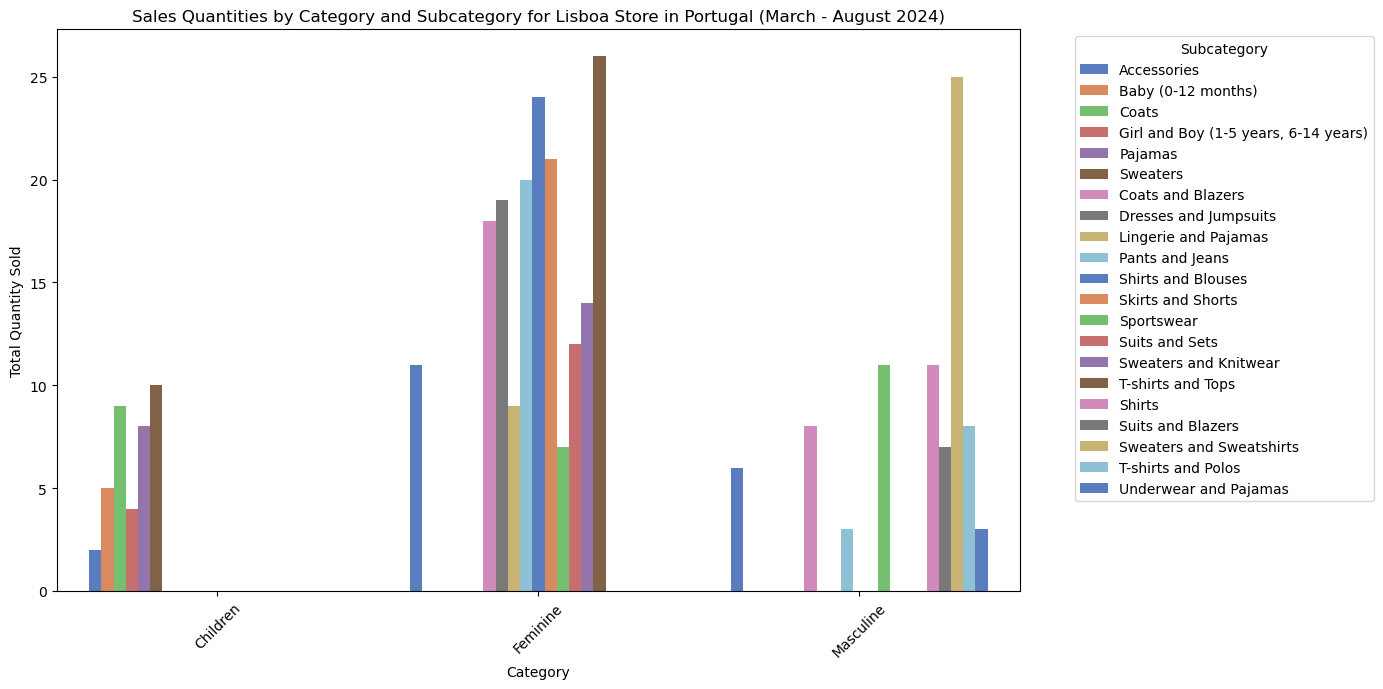

In [16]:
braga_sales_season = sales_full[
    (sales_full['Country'].str.lower() == 'portugal') &
    (sales_full['Store Name'].str.contains('Lisboa', case=False, na=False)) &  
    (sales_full['Date'].dt.year == 2024) &  
    (sales_full['Date'].dt.month >= 3) &  
    (sales_full['Date'].dt.month <= 8)    
    & (sales_full['Currency'] == 'EUR')  
]

braga_sales_category = braga_sales.merge(products[['Product ID', 'Category', 'Sub Category']], on='Product ID', how='left')

category_sales = braga_sales_category.groupby(['Category', 'Sub Category'])['Quantity'].sum().reset_index()

plt.figure(figsize=(14,7))
sns.barplot(data=category_sales, x='Category', y='Quantity', hue='Sub Category', palette="muted")
plt.title("Sales Quantities by Category and Subcategory for Lisboa Store in Portugal (March - August 2024)")
plt.xlabel("Category")
plt.ylabel("Total Quantity Sold")
plt.legend(title="Subcategory", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

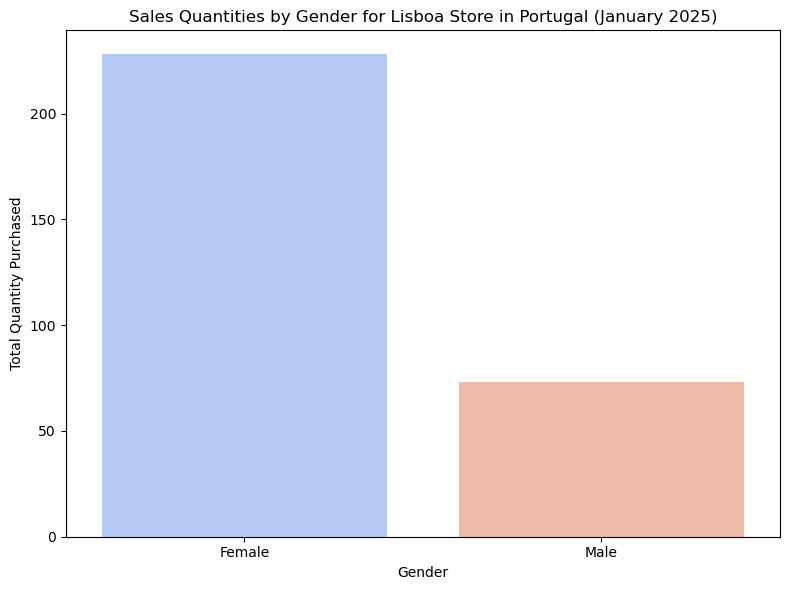

In [17]:
braga_sales_customers = braga_sales.merge(customers[['Customer ID', 'Gender']], on='Customer ID', how='left')

braga_sales_customers['Gender'] = braga_sales_customers['Gender'].apply(lambda x: 'Male' if 'M' in str(x) else ('Female' if 'F' in str(x) else 'Unknown'))

gender_sales = braga_sales_customers.groupby('Gender')['Quantity'].sum().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=gender_sales, x='Gender', y='Quantity', palette="coolwarm")
plt.title("Sales Quantities by Gender for Lisboa Store in Portugal (January 2025)")
plt.xlabel("Gender")
plt.ylabel("Total Quantity Purchased")
plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

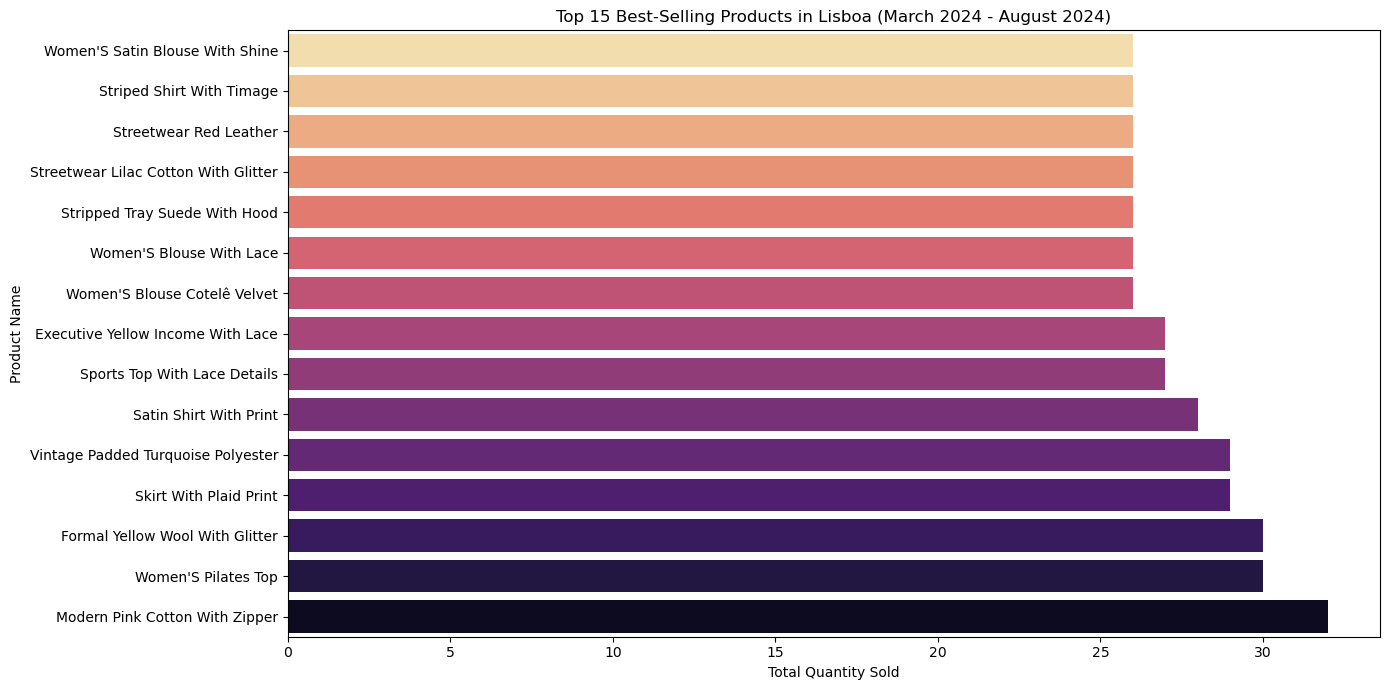

In [18]:
braga_sales_season = sales_full[
    (sales_full['Country'].str.lower() == 'portugal') &
    (sales_full['Store Name'].str.contains('Lisboa', case=False)) &
    (sales_full['Date'].dt.year == 2024) &  
    (sales_full['Date'].dt.month >= 3) &  
    (sales_full['Date'].dt.month <= 8)    
]

braga_sales_products = braga_sales_season.merge(
    products[['Product ID', 'Description EN']], 
    on='Product ID', 
    how='left'
)
braga_sales_products.rename(columns={'Description EN': 'Product Name'}, inplace=True)
braga_sales_products = braga_sales_products.loc[:, ~braga_sales_products.columns.duplicated()]

top15_products = braga_sales_products.groupby(['Product ID', 'Product Name'])['Quantity'].sum().reset_index()

top15_products = top15_products.sort_values(by='Quantity', ascending=False).head(15)

plt.figure(figsize=(14,7))
sns.barplot(data=top15_products, x='Quantity', y='Product Name', palette="magma")
plt.title("Top 15 Best-Selling Products in Lisboa (March 2024 - August 2024)")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

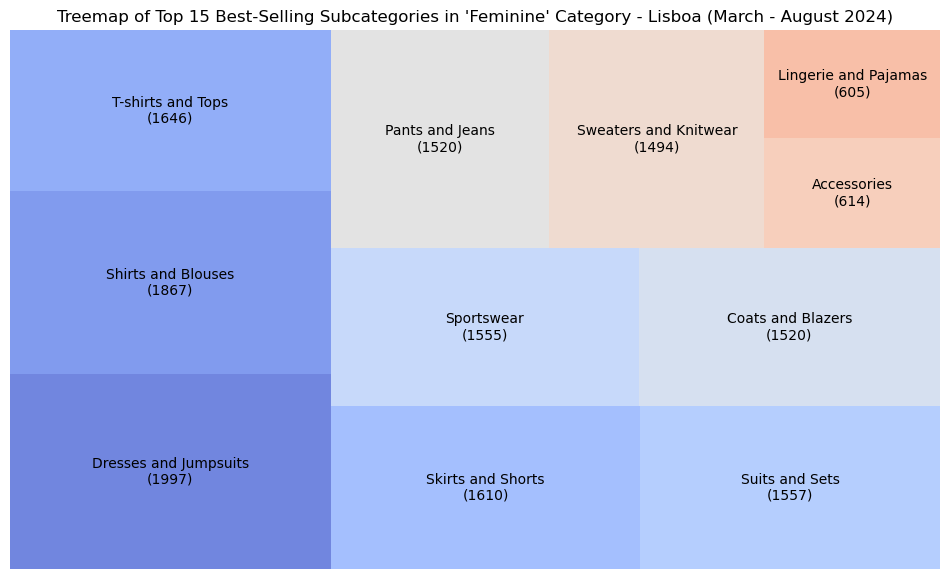

In [19]:

braga_sales_season = sales_full[
    (sales_full['Country'].str.lower() == 'portugal') &
    (sales_full['Store Name'].str.contains('Lisboa', case=False, na=False)) & 
    (sales_full['Date'].dt.year == 2024) &  
    (sales_full['Date'].dt.month >= 3) &  
    (sales_full['Date'].dt.month <= 8)    
]

braga_sales_subcategories = braga_sales_season.merge(
    products[['Product ID', 'Category', 'Sub Category']], 
    on='Product ID', 
    how='left'
)

braga_feminine_sales = braga_sales_subcategories[braga_sales_subcategories['Category'].str.lower() == 'feminine']

top15_feminine_subcategories = braga_feminine_sales.groupby(['Sub Category'], as_index=False)['Quantity'].sum()

top15_feminine_subcategories = top15_feminine_subcategories.sort_values(by='Quantity', ascending=False).head(15)

labels = [f"{subcat}\n({qty})" for subcat, qty in zip(top15_feminine_subcategories['Sub Category'], top15_feminine_subcategories['Quantity'])]

plt.figure(figsize=(12,7))
squarify.plot(
    sizes=top15_feminine_subcategories['Quantity'], 
    label=labels, 
    alpha=0.8, 
    color=sns.color_palette("coolwarm", 15)
)
plt.title("Treemap of Top 15 Best-Selling Subcategories in 'Feminine' Category - Lisboa (March - August 2024)")
plt.axis("off")  
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

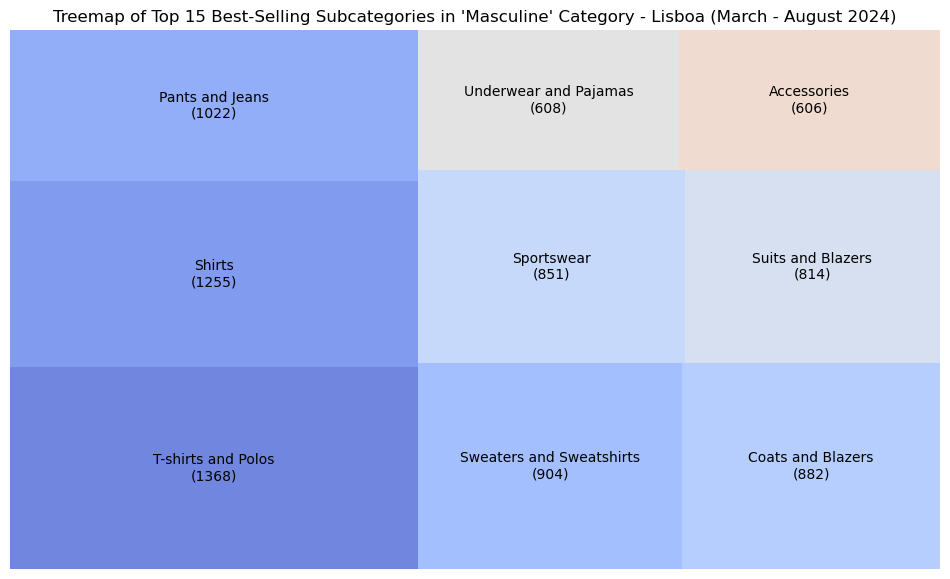

In [20]:
braga_sales_season = sales_full[
    (sales_full['Country'].str.lower() == 'portugal') &
    (sales_full['Store Name'].str.contains('Lisboa', case=False, na=False)) & 
    (sales_full['Date'].dt.year == 2024) &  
    (sales_full['Date'].dt.month >= 3) &  
    (sales_full['Date'].dt.month <= 8)    
]

braga_sales_subcategories = braga_sales_season.merge(
    products[['Product ID', 'Category', 'Sub Category']], 
    on='Product ID', 
    how='left'
)

braga_masculine_sales = braga_sales_subcategories[braga_sales_subcategories['Category'].str.lower() == 'masculine']

top15_masculine_subcategories = braga_masculine_sales.groupby(['Sub Category'], as_index=False)['Quantity'].sum()

top15_masculine_subcategories = top15_masculine_subcategories.sort_values(by='Quantity', ascending=False).head(15)

labels = [f"{subcat}\n({qty})" for subcat, qty in zip(top15_masculine_subcategories['Sub Category'], top15_masculine_subcategories['Quantity'])]

plt.figure(figsize=(12,7))
squarify.plot(
    sizes=top15_masculine_subcategories['Quantity'], 
    label=labels, 
    alpha=0.8, 
    color=sns.color_palette("coolwarm", 15)
)
plt.title("Treemap of Top 15 Best-Selling Subcategories in 'Masculine' Category - Lisboa (March - August 2024)")
plt.axis("off")  
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

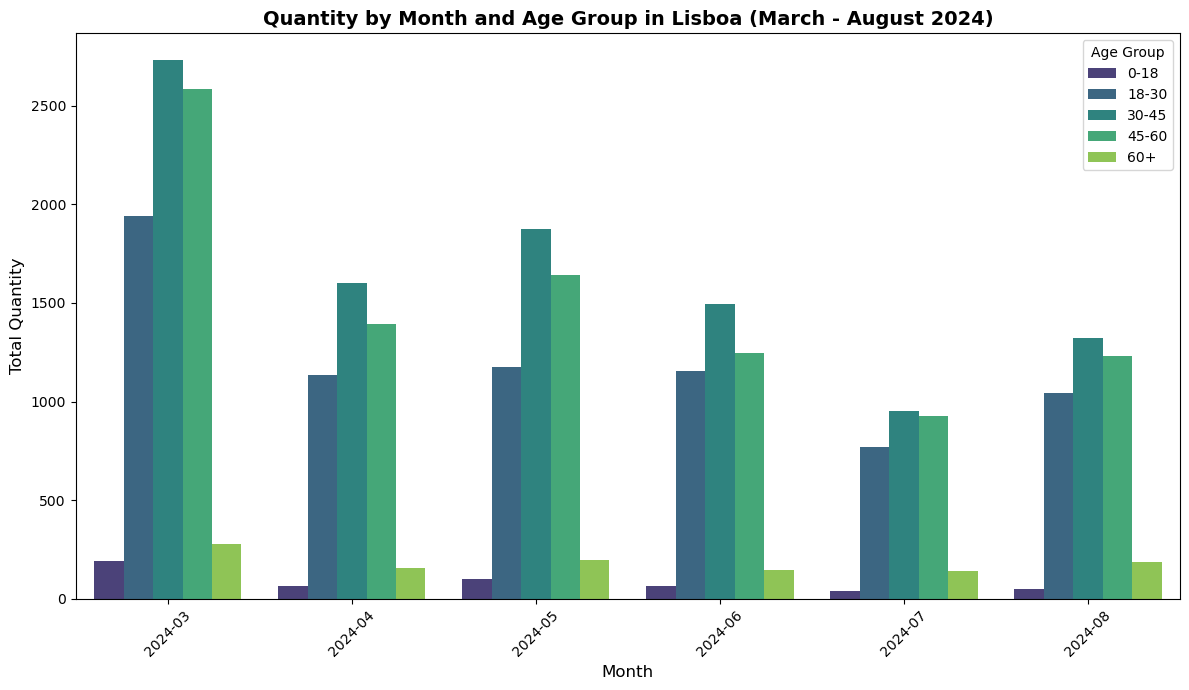

In [21]:

braga_sales = sales_full[
    (sales_full['Country'].str.lower() == 'portugal') &
    (sales_full['Store Name'].str.contains('Lisboa', case=False, na=False)) &
    (sales_full['Date'].dt.year == 2024) &
    (sales_full['Date'].dt.month >= 3) &
    (sales_full['Date'].dt.month <= 8)
]

braga_sales_age = braga_sales.merge(
    customers[['Customer ID', 'Date Of Birth']], 
    on='Customer ID', 
    how='left'
)

braga_sales_age['Date Of Birth'] = pd.to_datetime(braga_sales_age['Date Of Birth'])

braga_sales_age['Age'] = (braga_sales_age['Date'] - braga_sales_age['Date Of Birth']).dt.days // 365

bins = [0, 18, 30, 45, 60, 120]
labels = ['0-18', '18-30', '30-45', '45-60', '60+']
braga_sales_age['Age Group'] = pd.cut(braga_sales_age['Age'], bins=bins, labels=labels, right=False)

braga_sales_age['Month'] = braga_sales_age['Date'].dt.to_period('M').astype(str)

grouped = braga_sales_age.groupby(['Month', 'Age Group'])['Quantity'].sum().reset_index()

plt.figure(figsize=(12,7))
sns.barplot(data=grouped, x='Month', y='Quantity', hue='Age Group', palette='viridis')
plt.title("Quantity by Month and Age Group in Lisboa (March - August 2024)", fontsize=14, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Quantity", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()



findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

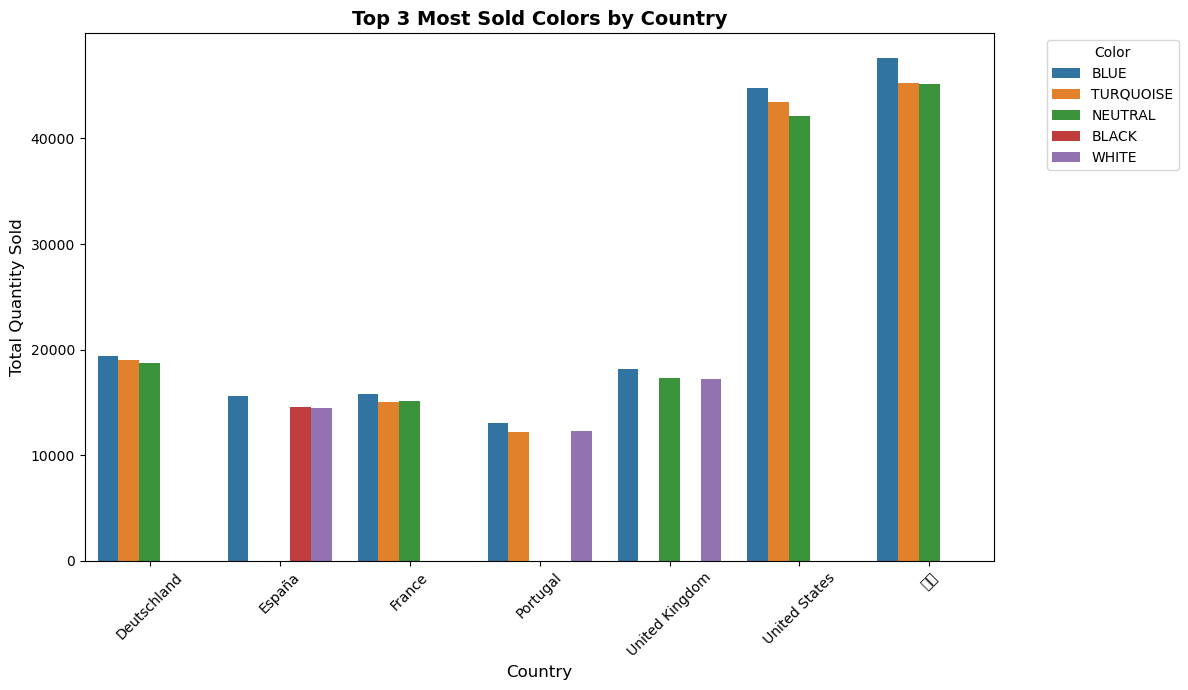

In [22]:
color_sales_by_country = sales_full.groupby(['Country', 'Color'])['Quantity'].sum().reset_index()

color_sales_by_country = color_sales_by_country.sort_values(by=['Country', 'Quantity'], ascending=[True, False])

top3_colors = color_sales_by_country.groupby("Country").head(3)

unique_colors = top3_colors["Color"].unique() 
palette = dict(zip(unique_colors, sns.color_palette("tab10", len(unique_colors)))) 

plt.figure(figsize=(12,7))
sns.barplot(data=top3_colors, x='Country', y='Quantity', hue='Color', palette=palette)  


plt.title("Top 3 Most Sold Colors by Country", fontsize=14, fontweight="bold")
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Quantity Sold", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Color", bbox_to_anchor=(1.05, 1), loc='upper left')  # Ajustar legenda

plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

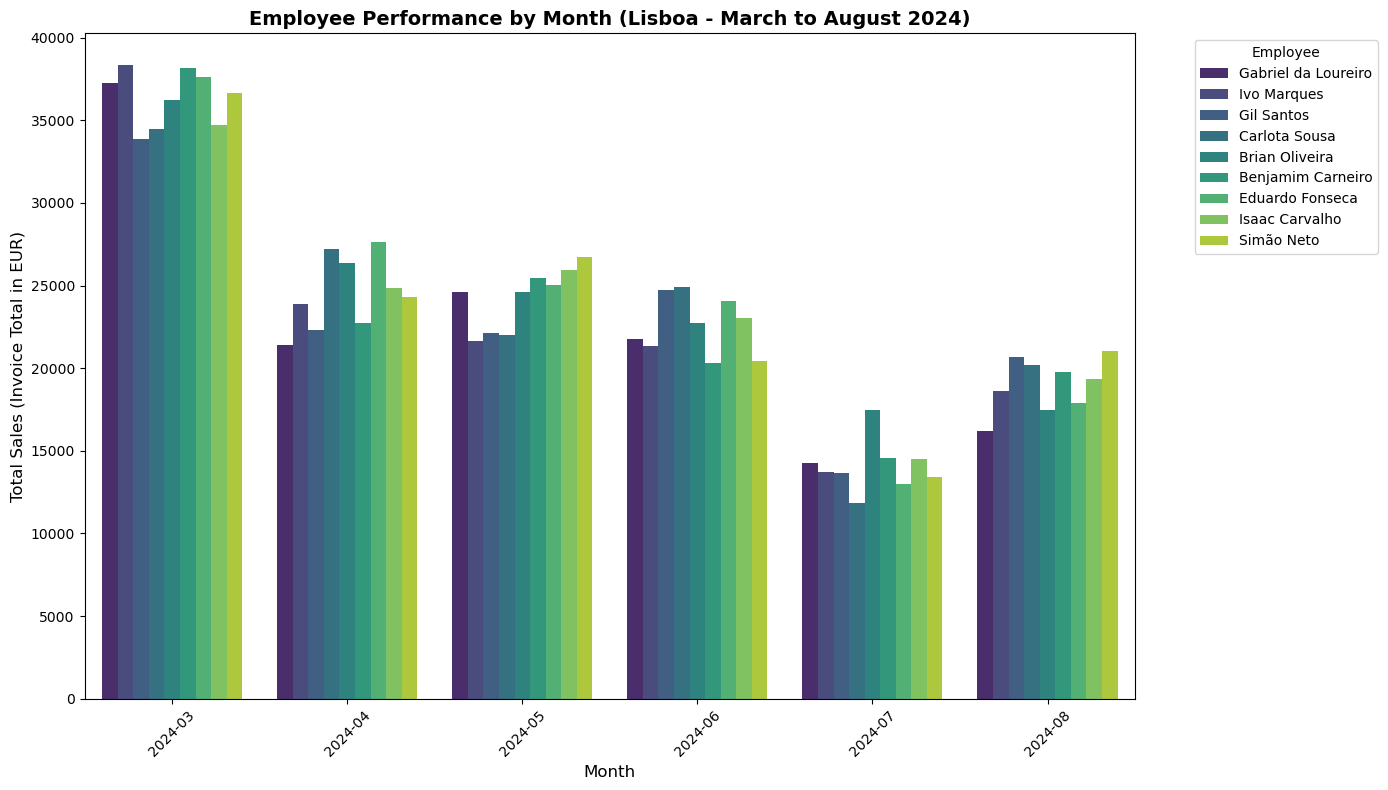

In [23]:
lisboa_sales = sales_full[
    (sales_full['Country'].str.lower() == 'portugal') &
    (sales_full['Store Name'].str.contains('Lisboa', case=False, na=False)) &
    (sales_full['Date'].dt.year == 2024) &
    (sales_full['Date'].dt.month >= 3) &
    (sales_full['Date'].dt.month <= 8)
]

lisboa_sales["Month"] = lisboa_sales["Date"].dt.strftime("%Y-%m")

employee_performance = (
    lisboa_sales.drop_duplicates(subset=['Invoice ID'])
    .groupby(["Month", "Employee ID"])["Invoice Total"]
    .sum()
    .reset_index()
)
name_column = "Name" if "Name" in employees.columns else "Employee Name" if "Employee Name" in employees.columns else "Employee ID"

employee_performance = employee_performance.merge(
    employees[['Employee ID', name_column]], on='Employee ID', how='left'
)

plt.figure(figsize=(14,8))
ax = sns.barplot(data=employee_performance, x="Month", y="Invoice Total", hue=name_column, palette="viridis")

plt.title("Employee Performance by Month (Lisboa - March to August 2024)", fontsize=14, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales (Invoice Total in EUR)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Employee", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

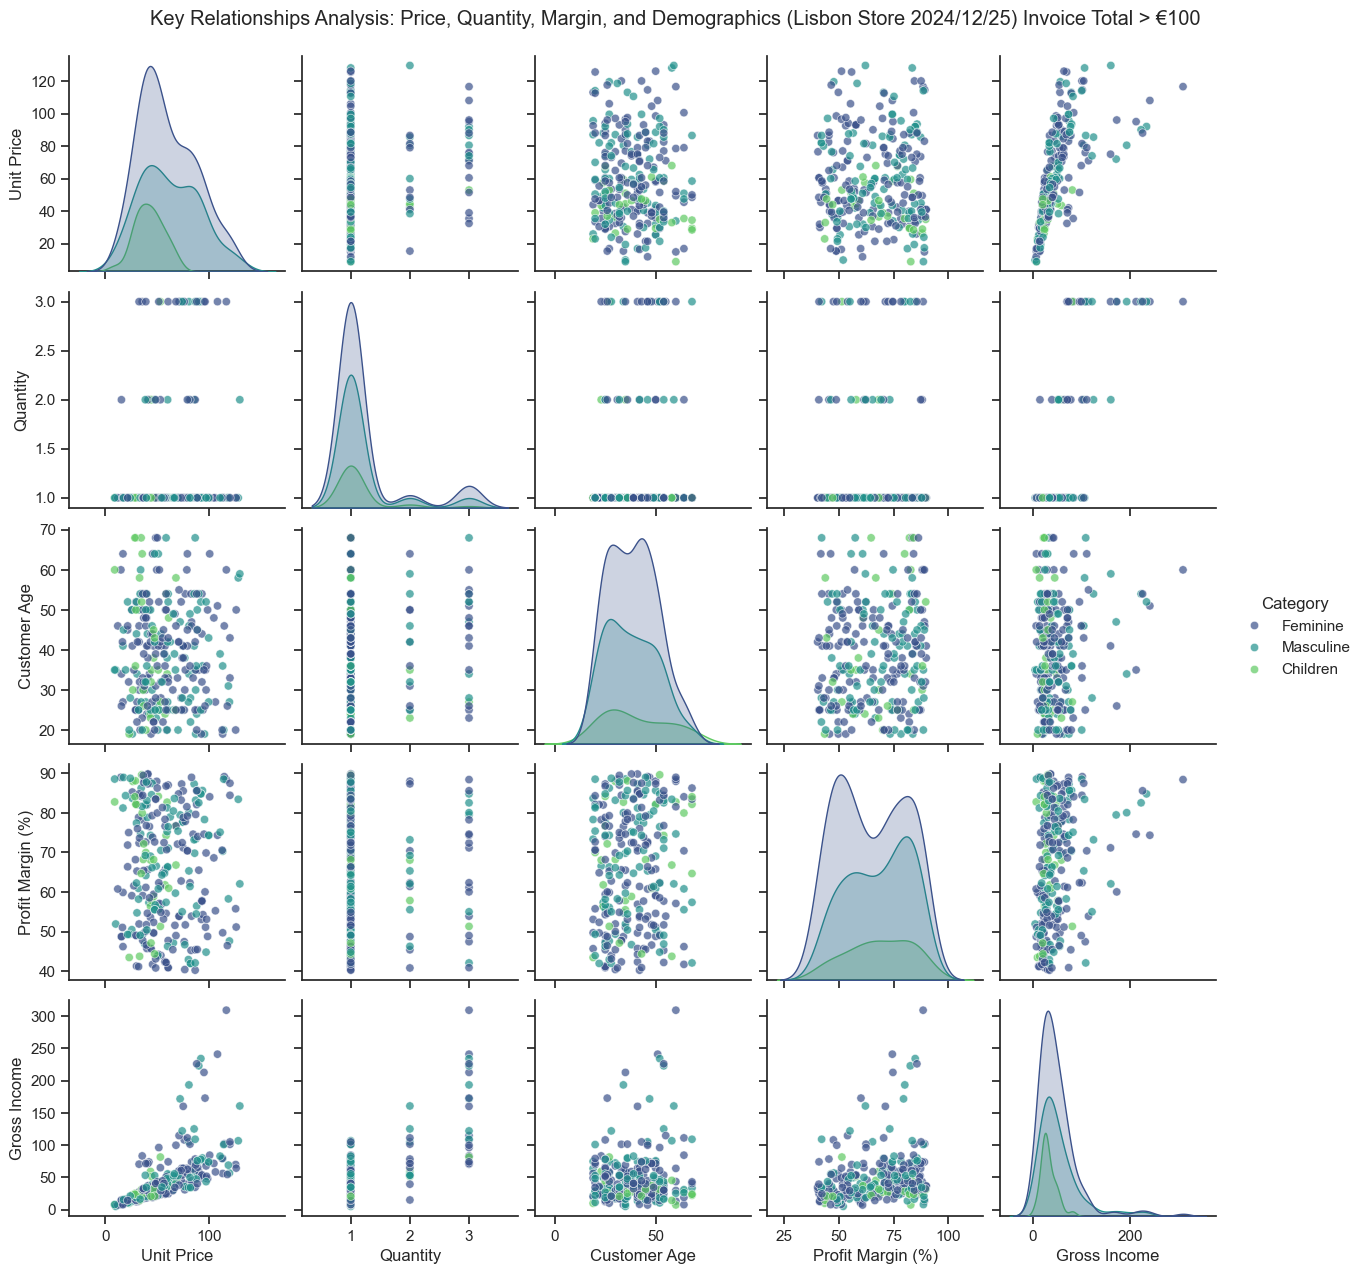

In [24]:
sells_lisbon = sales_full[
    (sales_full['Country'].str.lower() == 'portugal') &
    (sales_full['Store Name'].str.contains('Lisboa', case=False, na=False)) &
    (sales_full['Date'].dt.year == 2024) &
    (sales_full['Date'].dt.month == 12) &
    (sales_full['Date'].dt.day == 25) &
    (sales_full['Invoice Total'] > 100)
]


merged = sells_lisbon.merge(
    products[['Product ID', 'Category', 'Production Cost']],
    on='Product ID',
    how='left'
).merge(
    customers[['Customer ID', 'Date Of Birth']],
    on='Customer ID',
    how='left'
)

merged['Customer Age'] = pd.to_datetime(merged['Date Of Birth']).dt.year.apply(lambda x: 2024 - x)
merged['Gross Income'] = (merged['Unit Price'] - merged['Production Cost']) * merged['Quantity']
merged['Profit Margin (%)'] = ((merged['Unit Price'] - merged['Production Cost']) / merged['Unit Price']) * 100

analysis_vars = [
    'Unit Price', 'Quantity', 'Customer Age',
    'Profit Margin (%)', 'Gross Income', 'Category'
]

top_categories = merged['Category'].value_counts().nlargest(3).index
df_filtered = merged[merged['Category'].isin(top_categories)]

sns.set_theme(style="ticks")
g = sns.pairplot(
    df_filtered[analysis_vars],
    hue='Category',
    palette='viridis',
    plot_kws={'alpha': 0.7},
    diag_kind='kde'
)

plt.suptitle('Key Relationships Analysis: Price, Quantity, Margin, and Demographics (Lisbon Store 2024/12/25) Invoice Total > €100', y=1.02)
plt.show()